# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.

data = pd.read_excel('./Online Retail.xlsx')

In [3]:
#2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.

print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [5]:
df_cleaned = data.dropna()

In [6]:
df_cleaned = df_cleaned.drop(columns = 'Description')
df_cleaned = df_cleaned.drop(columns = 'CustomerID')

In [7]:
#3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.

df_stats = df_cleaned.describe()

print(df_stats)

            Quantity      UnitPrice
count  406829.000000  406829.000000
mean       12.061303       3.460471
std       248.693370      69.315162
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000


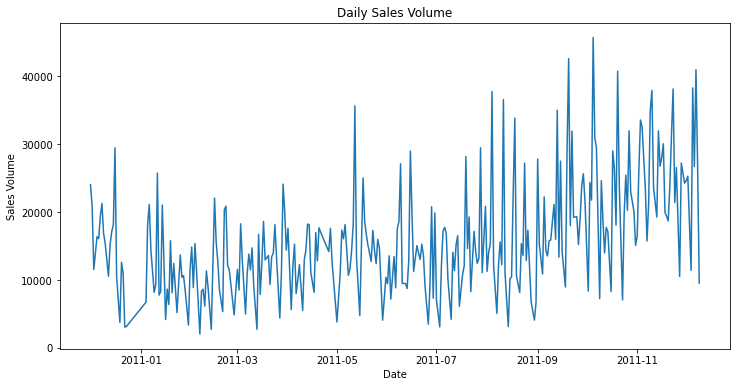

In [8]:
#4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.


df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

daily_sales = df_cleaned.groupby(df_cleaned['InvoiceDate'].dt.date)['Quantity'].sum()

plt.figure(figsize=(12, 6))
daily_sales.plot()
plt.title('Daily Sales Volume')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.show()

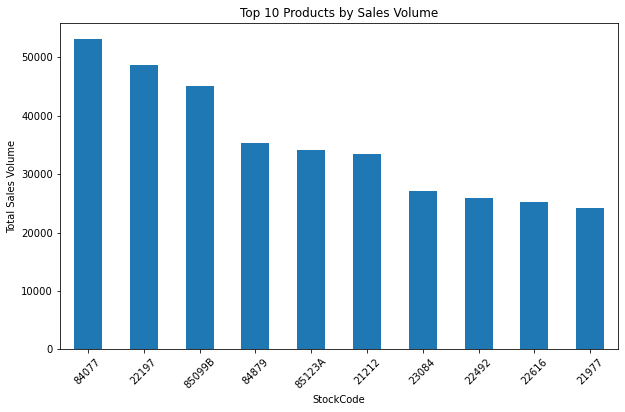

In [9]:
product_sales = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar')
plt.title('Top 10 Products by Sales Volume')
plt.xlabel('StockCode')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.show()

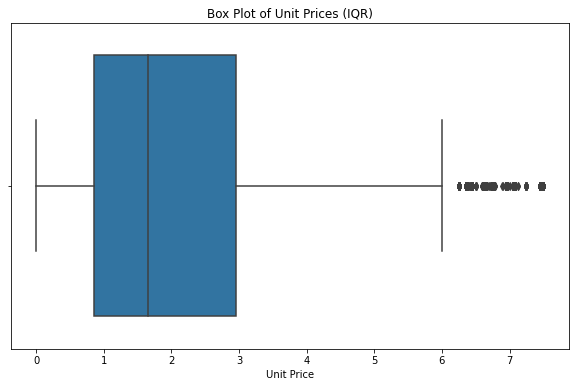

In [10]:
Q1 = df_cleaned['UnitPrice'].quantile(0.25)
Q3 = df_cleaned['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_prices = df_cleaned[(df_cleaned['UnitPrice'] >= lower_bound) & (df_cleaned['UnitPrice'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_prices['UnitPrice'])
plt.title('Box Plot of Unit Prices (IQR)')
plt.xlabel('Unit Price')

#plt.ylim(lower_bound, upper_bound)
plt.show()

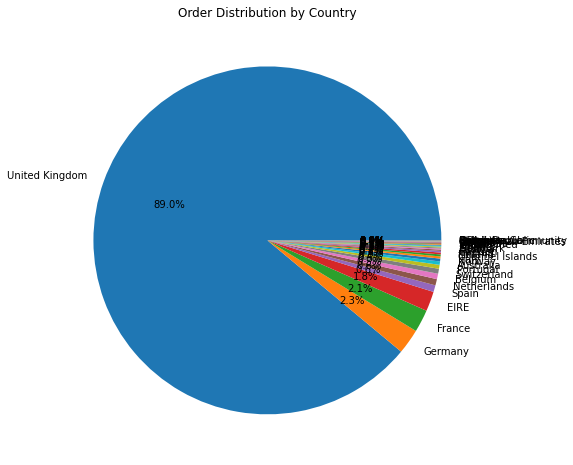

In [11]:

country_order_counts = df_cleaned['Country'].value_counts()


plt.figure(figsize=(10, 8))
country_order_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Order Distribution by Country')
plt.ylabel('') 
plt.show()


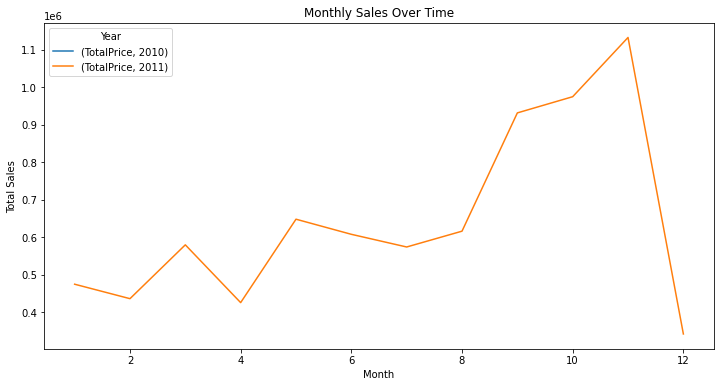

In [12]:

df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


df_cleaned['Year'] = df_cleaned['InvoiceDate'].dt.year
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['DayOfWeek'] = df_cleaned['InvoiceDate'].dt.dayofweek


monthly_sales = df_cleaned.groupby(['Year', 'Month']).agg({'TotalPrice': 'sum'})
daily_sales = df_cleaned.groupby('DayOfWeek').agg({'TotalPrice': 'sum'})


monthly_sales.unstack(level=0).plot(figsize=(12, 6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

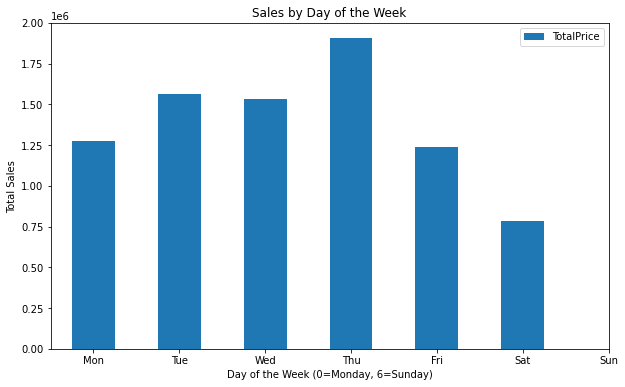

In [13]:

daily_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()

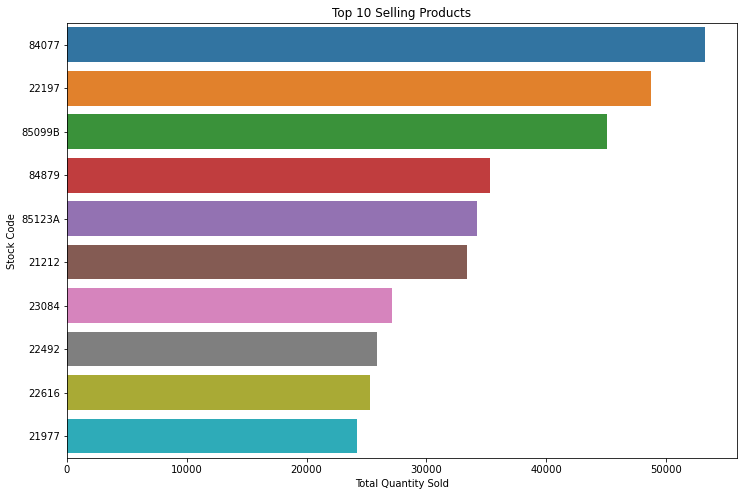

In [14]:
#Explore the top-selling products and countries based on the quantity sold.


top_products = df_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False)

top_10_products = top_products.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_products.values, y=top_10_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Stock Code')
plt.show()

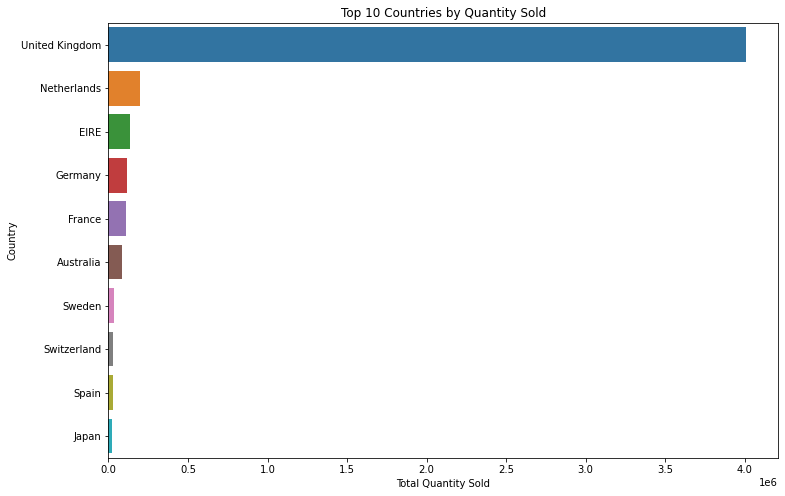

In [15]:
top_countries = df_cleaned.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

top_10_countries = top_countries.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries by Quantity Sold')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()

In [18]:
for col in ['Quantity', 'UnitPrice']:
    mean = df_cleaned[col].mean()
    std = df_cleaned[col].std()
    cutoff = std * 3
    lower, upper = mean - cutoff, mean + cutoff
    
    anomalies = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"Anomalies in {col} based on 3 standard deviations:\n{anomalies}\n")

Anomalies in Quantity based on 3 standard deviations:
       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
4287     C536757     84347     -9360 2010-12-02 14:23:00       0.03   
4850      536809     84950      1824 2010-12-02 16:48:00       0.55   
4945      536830     84077      2880 2010-12-02 17:38:00       0.18   
4946      536830     21915      1400 2010-12-02 17:38:00       1.06   
6365      536890    17084R      1440 2010-12-03 11:48:00       0.16   
...          ...       ...       ...                 ...        ...   
537883    581375     21137       960 2011-12-08 12:36:00       3.39   
540070    581458     22197      1500 2011-12-08 18:45:00       0.72   
540071    581459     22197      1200 2011-12-08 18:46:00       0.72   
540421    581483     23843     80995 2011-12-09 09:15:00       2.08   
540422   C581484     23843    -80995 2011-12-09 09:27:00       2.08   

               Country  TotalPrice  Year  Month  DayOfWeek  
4287    United Kingdom      -280

In [19]:
for col in ['Quantity', 'UnitPrice']:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    cutoff = IQR * 1.5
    lower, upper = Q1 - cutoff, Q3 + cutoff
   
    anomalies = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    print(f"Anomalies in {col} based on IQR:\n{anomalies}\n")

Anomalies in Quantity based on IQR:
       InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  \
9         536367     84879        32 2010-12-01 08:34:00       1.69   
31        536370     10002        48 2010-12-01 08:45:00       0.85   
44        536370     22492        36 2010-12-01 08:45:00       0.65   
46        536371     22086        80 2010-12-01 09:00:00       2.55   
65        536374     21258        32 2010-12-01 09:09:00      10.95   
...          ...       ...       ...                 ...        ...   
541835    581579     23581        40 2011-12-09 12:19:00       1.79   
541865    581583     20725        40 2011-12-09 12:23:00       1.45   
541866    581583     85038        36 2011-12-09 12:23:00       1.85   
541867    581584     20832        72 2011-12-09 12:25:00       0.72   
541868    581584     85038        48 2011-12-09 12:25:00       1.85   

               Country  TotalPrice  Year  Month  DayOfWeek  
9       United Kingdom       54.08  2010     12   